<a href="https://colab.research.google.com/github/andrepinotti/ICDS6-2024/blob/main/Andr%C3%A9Pinotti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nome do aluno: André Pinotti







Importaremos as bibliotecas de manipulação de dados

In [3]:
import pandas as pd
import numpy as np

Importaremos as bibliotecas de vizualizações de dados


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Primeiramente em nossa lógica, iremos ler o arquivo csv

In [7]:
df = pd.read_csv('AcidentesUSA.csv');
#Código para ler as primeiras linhas do csv
print(df.head())

   Unnamed: 0   ID   Source  Severity           Start_Time  \
0           0  A-1  Source2         3  2016-02-08 05:46:00   
1           1  A-2  Source2         2  2016-02-08 06:07:59   
2           2  A-3  Source2         2  2016-02-08 06:49:27   
3           3  A-4  Source2         3  2016-02-08 07:23:34   
4           4  A-5  Source2         2  2016-02-08 07:39:07   

              End_Time  Start_Lat  Start_Lng  End_Lat  End_Lng  ...  \
0  2016-02-08 11:00:00  39.865147 -84.058723      NaN      NaN  ...   
1  2016-02-08 06:37:59  39.928059 -82.831184      NaN      NaN  ...   
2  2016-02-08 07:19:27  39.063148 -84.032608      NaN      NaN  ...   
3  2016-02-08 07:53:34  39.747753 -84.205582      NaN      NaN  ...   
4  2016-02-08 08:09:07  39.627781 -84.188354      NaN      NaN  ...   

   Roundabout Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
0       False   False  False           False          False        False   
1       False   False  False           False    

Para nos organizarmos, iremos verificar as colunas


In [8]:
print(df.columns);

Index(['Unnamed: 0', 'ID', 'Source', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Street', 'City', 'County', 'State', 'Zipcode',
       'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


Agora poderemos fazer a primeira questão:
1. Análise de Gravidade de Acidente por Região:
   
   Crie um Dataframe com o agrupamento groupby(severidade, cidade) agrupado por contador de severidade.

  Após crie um gráfico interativo de barras no plotly, com informações de severidade dos acidentes que podem ser acessadas ao se passar o mouse por cima das barras.



In [9]:
#Primeiro tópico do exercício: criando o data frame agrupando severidade, cidade e contador
df_group = df.groupby(['Severity', 'City']).size().reset_index(name='contagem');
print(df_group);

      Severity             City  contagem
0            1           Alpine         1
1            1  American Canyon         1
2            1       Bellflower         1
3            1        Cambridge         1
4            1   Canyon Country         1
...        ...              ...       ...
1261         4        San Diego         2
1262         4         San Jose         2
1263         4      San Leandro         1
1264         4        Santa Ana         1
1265         4           Sylmar         1

[1266 rows x 3 columns]


In [10]:
grafico = px.bar(df_group,
             x='City',
             y='contagem',
             color='Severity',
             barmode='group',
             title="Análise de Gravidade de Acidente por Região",
             hover_data=['Severity', 'contagem'])
grafico.show();

Agora partiremos para o segundo exercício.
2. Análise da Gravidade do Acidente Versus Região Versus Horário do Dia:

  Crie um DataFrame com agrupamento groupby (Severity,City, Sunrise_Sunset)
  agrupado por contador de severidade.
  
  Crie um gráfico interativo de gráfico de dispersão no plotly, com
  informações de severidade dos acidentes que podem ser acessadas ao se
  passar o mouse por cima das bolinhas.

Primeiramente, faremos o agrupamento no dataframe com groupby dos respectivos dados: Severity, City, Sunrise_sunset

In [12]:
df_agrupado = df.groupby(['Severity', 'City', 'Sunrise_Sunset']).size().reset_index(name='contagem')
print(df_agrupado)

      Severity             City Sunrise_Sunset  contagem
0            1           Alpine            Day         1
1            1  American Canyon            Day         1
2            1       Bellflower            Day         1
3            1        Cambridge            Day         1
4            1   Canyon Country          Night         1
...        ...              ...            ...       ...
2181         4         San Jose            Day         1
2182         4         San Jose          Night         1
2183         4      San Leandro            Day         1
2184         4        Santa Ana          Night         1
2185         4           Sylmar            Day         1

[2186 rows x 4 columns]


Para finalizar, aqui está o grafico de bolinhas

In [15]:
grafico_bolinhas = px.scatter(df_agrupado,
                 x='City',
                 y='contagem',
                 color='Severity',
                 size='contagem',
                 hover_data=['Severity', 'City', 'Sunrise_Sunset', 'contagem'],
                 title="Análise de Gravidade de Acidentes por Cidade e Período do Dia")
grafico_bolinhas.show()

3. Análise de Gravidade do Acidente Versus Temperatura Versus Precipitação?

  Crie um DataFrame com agrupamento (Severity, City, Temperature(F),
  Precipitation(in) por contador de severidade para poder realizar a análise gráfica.

  Crie um gráfico de lmplot no seaborn, com informações de temperatura,
  ocorrência e severidade dos acidentes.


Primeiro tópico, DataFrame temperatura versus a Precipitação

In [16]:
df_temp =  df.groupby(['Severity', 'City', 'Temperature(F)', 'Precipitation(in)']).size().reset_index(name='contagem')
print(df_temp)

       Severity             City  Temperature(F)  Precipitation(in)  contagem
0             1           Alpine            73.4               0.00         1
1             1  American Canyon            52.0               0.00         1
2             1       Bellflower            77.0               0.00         1
3             1        Cambridge            46.0               0.08         1
4             1   Canyon Country            82.0               0.00         1
...         ...              ...             ...                ...       ...
25716         4         San Jose            66.0               0.00         1
25717         4         San Jose            89.6               0.00         1
25718         4      San Leandro            62.1               0.00         1
25719         4        Santa Ana            62.1               0.00         1
25720         4           Sylmar           999.0               0.00         1

[25721 rows x 5 columns]


Gráfico de implot no seaborn

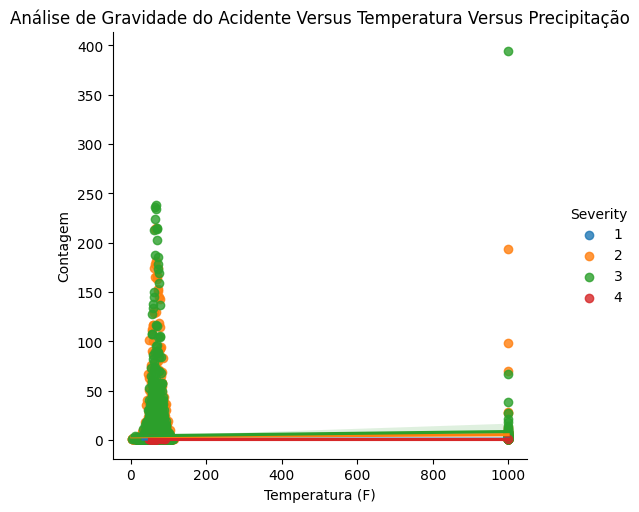

In [17]:
sns.lmplot(x='Temperature(F)', y='contagem', hue='Severity', data=df_temp)
#Adicionando nomes ao título e os dois labels do gráfico utilizando o a biblioteca matplotlib.pyplot
plt.title('Análise de Gravidade do Acidente Versus Temperatura Versus Precipitação')
plt.xlabel('Temperatura (F)')
plt.ylabel('Contagem')
plt.show()


  4. Análise de Severidade por Região:
  
  Crie um DataFrame com agrupamento groupby(Severity, City) agrupado por
  contador de Severity. Use o sort_values no seu datframe desta analise   para ordenar a coluna Severity.

  Crie um gráfico de barras no lmplot do seaborn, com informações de cidade, quantidade de acidentes e severidade dos acidentes.

Farei um agrupamento ordenando nosso DataFrame pela Severidade

In [23]:
df_regiao = df.groupby(['Severity', 'City']).size().reset_index(name='contagem')
df_ordenado = df_regiao.sort_values(by='Severity')
print(df_regiao)

      Severity             City  contagem
0            1           Alpine         1
1            1  American Canyon         1
2            1       Bellflower         1
3            1        Cambridge         1
4            1   Canyon Country         1
...        ...              ...       ...
1261         4        San Diego         2
1262         4         San Jose         2
1263         4      San Leandro         1
1264         4        Santa Ana         1
1265         4           Sylmar         1

[1266 rows x 3 columns]


  Criaremos o gráfico de barras no lmplot do seaborn, com informações de cidade, quantidade de acidentes e severidade dos acidentes.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



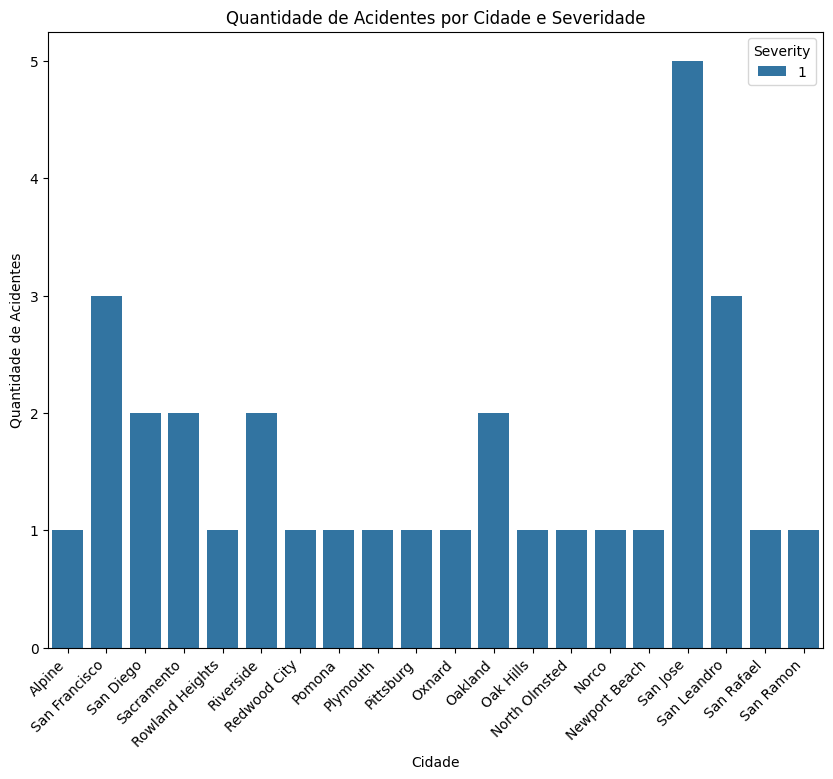

In [30]:
#Para que não usemos muitas cidades e com isso não fique com os nomes sobrepostos
df_maiores_cidades = df_ordenado.head(20)

plt.figure(figsize=(10, 8))
sns.barplot(
    df_maiores_cidades,
    x='City',
    y='contagem',
    hue='Severity'
)

# Labels do nosso gráfico
plt.title('Quantidade de Acidentes por Cidade e Severidade')
plt.xlabel('Cidade')
plt.ylabel('Quantidade de Acidentes')

# Rotacionando os nomes das cidades
plt.xticks(rotation=45, ha='right')


plt.show()